In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
inputdir = './input/'
outputdir = './output/'
import os
for dirname, _, filenames in os.walk(inputdir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./input/gender_submission.csv
./input/test.csv
./input/train.csv


In [52]:
train_data = pd.read_csv( inputdir + "train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
test_data = pd.read_csv(inputdir + "test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [54]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [55]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [56]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X_train = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv(outputdir + 'submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [57]:
from sklearn.preprocessing import LabelEncoder
train_df = train_data
test_df = test_data
# Sex 열 변환 (male=0, female=1)
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})
# Embarked 열 변환 (C=0, Q=1, S=2)
train_df['Embarked'] = train_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
test_df['Embarked'] = test_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
# Name과 Ticket 열 변환
label_encoder = LabelEncoder()

train_df['Name'] = label_encoder.fit_transform(train_df['Name'])
train_df['Ticket'] = label_encoder.fit_transform(train_df['Ticket'])
train_df['Cabin'] = label_encoder.fit_transform(train_df['Cabin'])

test_df['Name'] = label_encoder.fit_transform(test_df['Name'])
test_df['Ticket'] = label_encoder.fit_transform(test_df['Ticket'])
test_df['Cabin'] = label_encoder.fit_transform(test_df['Cabin'])

print(train_df)
print(test_df)

     PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket   
0              1         0       3   108    0  22.0      1      0     523  \
1              2         1       1   190    1  38.0      1      0     596   
2              3         1       3   353    1  26.0      0      0     669   
3              4         1       1   272    1  35.0      1      0      49   
4              5         0       3    15    0  35.0      0      0     472   
..           ...       ...     ...   ...  ...   ...    ...    ...     ...   
886          887         0       2   548    0  27.0      0      0     101   
887          888         1       1   303    1  19.0      0      0      14   
888          889         0       3   413    1   NaN      1      2     675   
889          890         1       1    81    0  26.0      0      0       8   
890          891         0       3   220    0  32.0      0      0     466   

        Fare  Cabin  Embarked  
0     7.2500    147       2.0  
1    71.283

In [58]:
t = pd.read_csv(inputdir + 'gender_submission.csv')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,0,22.0,1,0,523,7.2500,147,2.0
1,2,1,1,190,1,38.0,1,0,596,71.2833,81,0.0
2,3,1,3,353,1,26.0,0,0,669,7.9250,147,2.0
3,4,1,1,272,1,35.0,1,0,49,53.1000,55,2.0
4,5,0,3,15,0,35.0,0,0,472,8.0500,147,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,0,27.0,0,0,101,13.0000,147,2.0
887,888,1,1,303,1,19.0,0,0,14,30.0000,30,2.0
888,889,0,3,413,1,NaN,1,2,675,23.4500,147,2.0
889,890,1,1,81,0,26.0,0,0,8,30.0000,60,0.0


In [59]:
train_df['Age'].fillna(30, inplace=True)
test_df['Age'].fillna(30, inplace=True)
train_df['Embarked'].fillna(1, inplace=True)
test_df['Embarked'].fillna(1, inplace=True)
x_train = np.array(train_df.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket']).values)
t_train = np.array(train_df.Survived)
x_test = np.array(test_df.drop(columns=['PassengerId', 'Name', 'Ticket']).values)
t_test = np.array(t.drop(columns=['PassengerId']).values)
t_test = t_test.squeeze()
train_size = x_train.shape[0]
test_size = x_test.shape[0]

In [60]:
print(x_train.shape)
print(x_test.shape)
print(t_train.shape)
print(t_test.shape)
print(t_test)
x_train

(891, 8)
(418, 8)
(891,)
(418,)
[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


array([[  3.    ,   0.    ,  22.    , ...,   7.25  , 147.    ,   2.    ],
       [  1.    ,   1.    ,  38.    , ...,  71.2833,  81.    ,   0.    ],
       [  3.    ,   1.    ,  26.    , ...,   7.925 , 147.    ,   2.    ],
       ...,
       [  3.    ,   1.    ,  30.    , ...,  23.45  , 147.    ,   2.    ],
       [  1.    ,   0.    ,  26.    , ...,  30.    ,  60.    ,   0.    ],
       [  3.    ,   0.    ,  32.    , ...,   7.75  , 147.    ,   1.    ]])

In [61]:
x_test

array([[ 3.    ,  0.    , 34.5   , ...,  7.8292, 76.    ,  1.    ],
       [ 3.    ,  1.    , 47.    , ...,  7.    , 76.    ,  2.    ],
       [ 2.    ,  0.    , 62.    , ...,  9.6875, 76.    ,  1.    ],
       ...,
       [ 3.    ,  0.    , 38.5   , ...,  7.25  , 76.    ,  2.    ],
       [ 3.    ,  0.    , 30.    , ...,  8.05  , 76.    ,  2.    ],
       [ 3.    ,  0.    , 30.    , ..., 22.3583, 76.    ,  0.    ]])

In [62]:
import sys
sys.path.append('C:/Users/dinle/Code/AI/Kaggle/Model/NodeLayer')

from network.multi_layer_net_extend import MultiLayerNetExtend as mt1

import matplotlib.pyplot as plt
from util import smooth_curve
from optimizer import *
import numpy as np
import time

In [63]:
def test(test_list):
    networks = {}
    train_acc = {}
    train_loss = {}
    test_acc = {}
    test_loss = {}
    optimizer = {}
    time_record = {}

    for key in test_list.keys():
        # 기록 리스트 생성
        train_acc[key] = []
        train_loss[key] = []
        test_acc[key] = []
        test_loss[key] = []
        time_record[key] = 0

        # nSigmoid 경우 파라미터
        # key == 'nSigmoid_8' -> act = nSigmoid, threshold = 8
        model = test_list[key]['model']
        opt = test_list[key]['opt']
        lr = test_list[key]['lr']


        # 네트워크와 optimizer 생성
        if model == 'cv1':
            networks[key] = cv1()
        elif model == 'cv':
            networks[key] = cv2()
        elif model == 'mt1':
            act = test_list[key]['act']
            std = test_list[key]['std']
            dr = test_list[key]['dr']
            bn = test_list[key]['bn']
            bp = test_list[key]['bp']
            do = False
            if dr is not None:
                do = True
            networks[key] = mt1(input_size=8, hidden_size_list=[100, 100, 100],
                output_size=2, use_dropout=do, dropout_ration=dr, activation=act, weight_init_std=std,  use_batchnorm=bn, batch_pos=bp)
        else:
            act = test_list[key]['act']
            std = test_list[key]['std']
            dr = test_list[key]['dr']
            bn = test_list[key]['bn']
            do = False
            if dr is not None:
                do = True
            networks[key] = mt2(input_size=784, hidden_size_list=[100, 100, 100, 100],
                output_size=10, use_dropout=do, dropout_ration=dr, activation=act, weight_init_std=std,  use_batchnorm=bn)
        if opt == 'SGD':
            optimizer[key] = SGD(lr)
        elif opt == 'AdaGrad':
            optimizer[key] = AdaGrad(lr)
        else:
            optimizer[key] = Adam(lr)

    # 학습
    for i in range(max_iterations):

        # mini-batch train
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        # mini-batch test
        batch_mask_t = np.random.choice(test_size, batch_size)
        x_batch_t = x_test[batch_mask_t]
        t_batch_t = t_test[batch_mask_t]

        if i % 100 == 0:
            print( "===========" + "iteration:" + str(i) + "===========")

        # 학습
        for key in test_list.keys():
            start = time.time()
            if test_list[key]['model'].startswith('cv'):
                x_batch = x_batch.reshape(-1, 1, 28, 28)
                x_batch_t = x_batch_t.reshape(-1, 1, 28, 28)
            # 학습
            grads = networks[key].gradient(x_batch, t_batch)
            optimizer[key].update(networks[key].params, grads)

            # 기록
            train_acc[key].append(networks[key].accuracy(x_batch, t_batch))
            train_loss[key].append(networks[key].loss(x_batch, t_batch))
            test_acc[key].append(networks[key].accuracy(x_batch_t, t_batch_t))
            test_loss[key].append(networks[key].loss(x_batch_t, t_batch_t))


            # 100회마다 경과 출력
            if i % 100 == 0:
                # print(key + " loss:" + str(acc))
                t_loss = networks[key].loss(x_batch_t, t_batch_t)
                t_acc = networks[key].accuracy(x_batch_t, t_batch_t)
                end = time.time()
                time_record[key] += (end-start)
                print(key + "\n loss:" + str(t_loss))
                print("acc:" + str(t_acc))
                print("time:" + str(time_record[key]))
            else:
                end = time.time()
                time_record[key] += (end-start)

    return train_acc, train_loss, test_acc, test_loss


def plot(label, datas, t_list, *y_lim):
    for key in t_list:
        plt.plot(mi, smooth_curve(datas[key]), markevery=50, label=key)
    plt.xlabel("iterations")
    plt.ylabel(label)
    if y_lim:
        plt.ylim(y_lim)
    plt.legend()
    plt.show()

In [64]:
batch_size = 64
max_iterations = 3000
mi = np.arange(max_iterations)

In [65]:
test_list = {
             'test':
                 {'model':'mt1','opt':'SGD','act':'relu','std':'he','dr':None,'bn':True,'bp':1,'lr':0.01},
             'test2':
                 {'model':'mt1','opt':'AdaGrad','act':'relu','std':'he','dr':None,'bn':True,'bp':1,'lr':0.01},
             'test3':
                 {'model':'mt1','opt':'Adam','act':'relu','std':'he','dr':None,'bn':True,'bp':1,'lr':0.01},
            #  'Node_BN1':
            #      {'model':'mt1','act':'relu','std':'he','dr':None,'bn':True,'bp':1,'lr':0.01},
            # 'Node_BN2':
            #      {'model':'mt1','act':'relu','std':'he','dr':None,'bn':True,'bp':2,'lr':0.01},

             }



train_acc, train_loss, test_acc, test_loss = test(test_list)

===========iteration:0===========
test loss:9.821981399659357
acc:0.390625
time:0.009998559951782227
test2 loss:9.553912423256229
acc:0.40625
time:0.009999990463256836
test3 loss:5.7924405605006495
acc:0.640625
time:0.013001441955566406
===========iteration:100===========
test loss:0.753233844438518
acc:0.640625
time:0.9063820838928223
test2 loss:0.7364001158337072
acc:0.625
time:0.9227817058563232
test3 loss:0.7440435636219458
acc:0.671875
time:0.8746817111968994
===========iteration:200===========
test loss:0.8922092592090161
acc:0.359375
time:1.7473671436309814
test2 loss:0.9264285192587054
acc:0.453125
time:1.782850742340088
test3 loss:0.4442325954415965
acc:0.890625
time:1.7418594360351562
===========iteration:300===========
test loss:0.739474385788383
acc:0.515625
time:2.577566623687744
test2 loss:0.5271341131106153
acc:0.8125
time:2.6367809772491455
test3 loss:0.4300252430054523
acc:0.734375
time:2.5959794521331787
===========iteration:400===========
test loss:0.8873166875783838

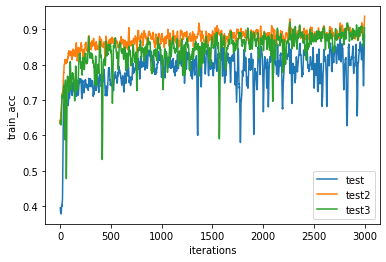

In [66]:
plot('train_acc', train_acc, test_list)

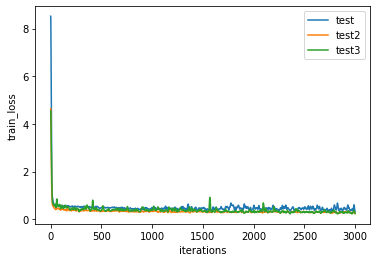

In [67]:
plot('train_loss', train_loss, test_list)

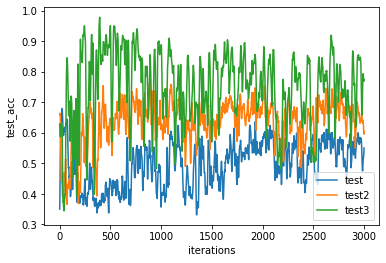

In [68]:
plot('test_acc', test_acc, test_list)

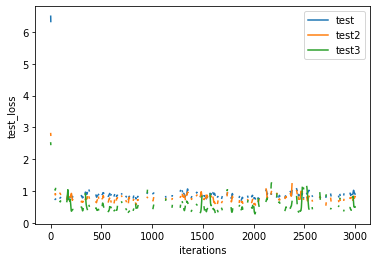

In [69]:
plot('test_loss', test_loss, test_list)

In [70]:
print(test_loss)

{'test': [9.821981399659357, 10.822686116076838, 7.256135852878839, 4.0012834624301465, 2.578304399308744, 1.349424885309386, 0.6923676771662877, nan, 1.6344680491052033, 0.6596066288586728, 0.8944346112112381, 0.7674534000311669, 0.5955397004920219, 0.7449318012083127, 0.8071465361491172, nan, nan, 0.8424635341297932, 0.7662038029850975, 0.757470499475341, 0.6389727106758434, nan, 0.7190227361832835, 0.6956766723468157, 0.7872166897658536, 0.5930850439550728, 0.6372629066662618, 0.619151781019085, 0.7511466008956476, nan, 0.6107552265481773, nan, 0.7123391802956618, 0.7004403956796731, nan, 0.7669755857884029, 0.755096344736555, 0.7096939113217918, nan, 0.7179175842638952, 0.7159139771226473, 0.7465717737593809, 0.7876117012643908, 0.8873893494704443, 0.7276315539304681, 0.5767973712816284, 0.6623229682711985, 0.8491229287879043, 0.7074433240803255, 0.8135849091146081, 0.8088766559717768, 0.754945900351808, 0.7393224025698268, 0.7960417870275156, nan, 0.7458242495445371, 0.72703052615